### TOR 1A
Calvin Jonathan Djulianus (BMS/232200137)             
Reuben Zachary Susanto (IBDA/232202462)              
Paulina Devina Wijaya (IBDA/232300125)            
Henri Rusmanto (CFP/232203201)            
Kezia Durry (CFP/232200169)            
Yosafat Rohan Ariyanto (SCCE/232203197)            

In [22]:
# Import the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
main_df = pd.read_csv("Dataset1A.csv")
main_df.shape

(40949, 16)

In [24]:
# See the columns
main_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Kita hanya tertarik untuk melihat jumlah views, likes, dan dislikes

In [25]:
temp_df = main_df[['views', 'likes', 'dislikes']]
temp_df.head()

,views,likes,dislikes
0,748374,57527,2966
1,2418783,97185,6146
2,3191434,146033,5339
3,343168,10172,666
4,2095731,132235,1989


Tugas 1: Membuat rangkuman statistika kuantitatif atas tiga parameter numerik #views, #likes, dan #dislikes dari semua data video.

In [26]:
columns_arr = temp_df.columns.to_list()
avg_val_dict = {col: np.mean(main_df[col]) for col in columns_arr}
median_val_dict = {col: np.median(main_df[col]) for col in columns_arr}
mode_val_dict = {col: main_df[col].mode()[0] for col in columns_arr}
std_val_dict = {col: main_df[col].describe().loc['std'] for col in columns_arr} 
quartile_val_dict = {col: main_df[col].quantile([0.25, 0.5, 0.75]).to_list() for col in columns_arr}
IQR_val_dict = {col: main_df[col].quantile(0.75) - main_df[col].quantile(0.25) for col in columns_arr}

outliers_val_dict = {}
for col in columns_arr:
    Q1, Q3 = main_df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    bottom_part = max(Q1 - 1.5 * IQR, min(main_df[col].values))
    upper_part = min(Q3 + 1.5 * IQR, max(main_df[col].values))

    outliers = (main_df[col] < bottom_part) | (main_df[col] > upper_part)
    outliers_val_dict[col] = main_df[col][outliers].to_list()


In [27]:
# Show the results
for col in columns_arr:
    print(f"Quantitative analysis for column {col}:")
    print(f"Mean value: {avg_val_dict[col]}")
    print(f"Median value: {median_val_dict[col]}")
    print(f"Mode value: {mode_val_dict[col]}")
    print(f"Standard Deviation: {std_val_dict[col]}")
    print(f"Quartile values:\nQ1 = {quartile_val_dict[col][0]}\nQ2 = {quartile_val_dict[col][1]}\nQ3 = {quartile_val_dict[col][2]}")
    print(f"IQR values: {IQR_val_dict[col]}")
    print(f"Outliers: {sorted(outliers_val_dict[col])}")
    print(f"Number of outliers: {len(outliers_val_dict[col])}")
    print()

Quantitative analysis for column views:
Mean value: 2360784.6382573447
Median value: 681861.0
Mode value: 2078
Standard Deviation: 7394113.759703945
Quartile values:
Q1 = 242329.0
Q2 = 681861.0
Q3 = 1823157.0
IQR values: 1580828.0
Outliers: [4195355, 4195422, 4196137, 4196683, 4196932, 4197810, 4198238, 4199247, 4199687, 4199910, 4200999, 4201738, 4203082, 4203581, 4203633, 4203879, 4206357, 4209089, 4213948, 4215508, 4215671, 4216147, 4216350, 4216551, 4216618, 4216896, 4218040, 4219141, 4219363, 4219827, 4221639, 4221902, 4222286, 4223354, 4223613, 4223964, 4224265, 4227252, 4227545, 4229629, 4236369, 4236664, 4236930, 4238781, 4239111, 4241964, 4242078, 4242693, 4244395, 4244461, 4244664, 4246804, 4249082, 4250028, 4251094, 4251667, 4252020, 4252961, 4253449, 4255786, 4256549, 4257752, 4259413, 4259440, 4259924, 4262630, 4263652, 4263871, 4265080, 4265963, 4266983, 4267127, 4267219, 4269447, 4269791, 4270418, 4270738, 4270861, 4273711, 4274193, 4274485, 4275831, 4276583, 4278491, 42

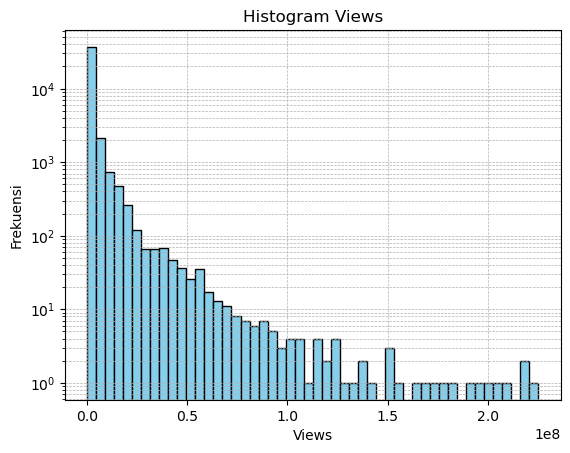

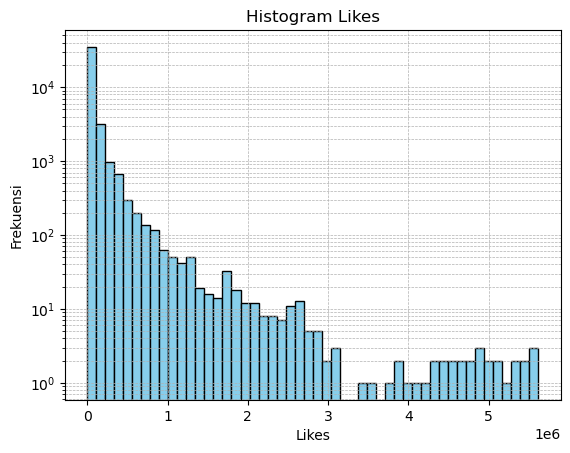

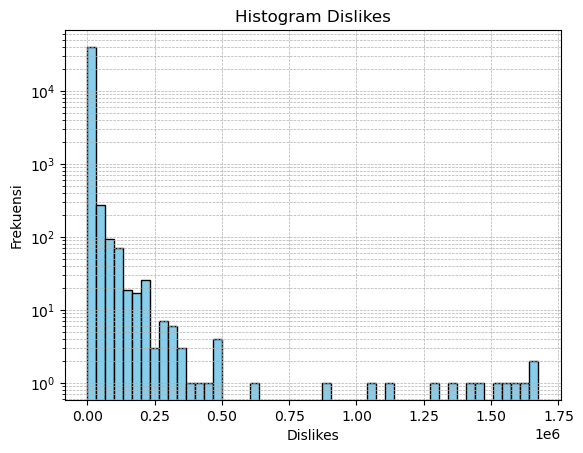

In [28]:
for col in (columns_arr):
    plt.hist(main_df[col], bins=50, color='skyblue', edgecolor='black')
    plt.yscale('log')
    plt.title(f'Histogram {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Frekuensi')
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()

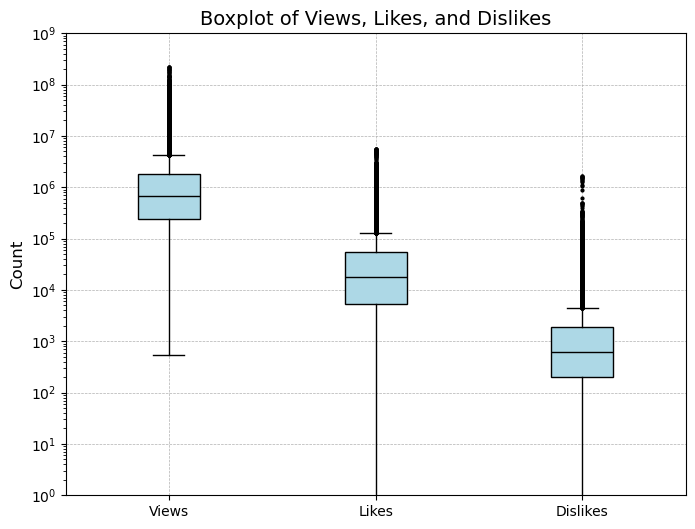

In [29]:
plt.figure(figsize=(8, 6))

plt.boxplot([main_df[col] for col in columns_arr], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(marker='o', markerfacecolor='black', markersize=2))

plt.yscale('log')
plt.ylim(10**0, 10**9)
plt.title("Boxplot of Views, Likes, and Dislikes", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xticks([1, 2, 3], [col.capitalize() for col in columns_arr])
plt.grid(True, linestyle="--", linewidth=0.5) 

plt.show()

In [30]:
data_views_per_kategori = main_df.groupby('category_id')['views'].mean().astype('int64')
print("Rata-rata views per kategori:")
print(data_views_per_kategori)

Rata-rata views per kategori:
category_id
1     3106250
2     1355965
10    6201003
15     831143
17    2025969
19     854619
20    2620830
22    1531835
23    1480308
24    2067883
25     592587
26     983730
27     712940
28    1452626
29    2963884
43     903527
Name: views, dtype: int64


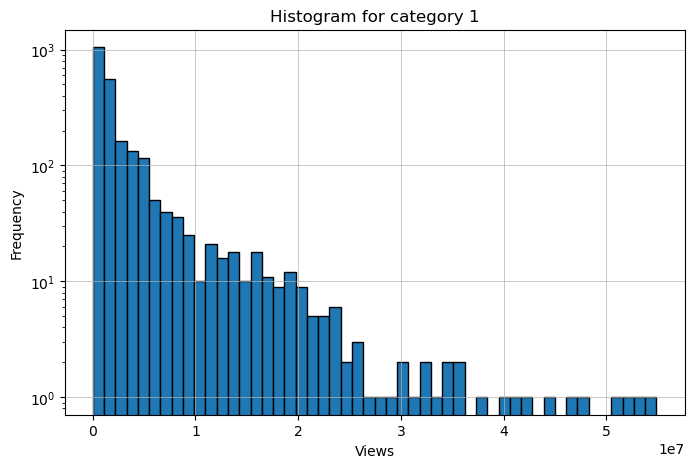

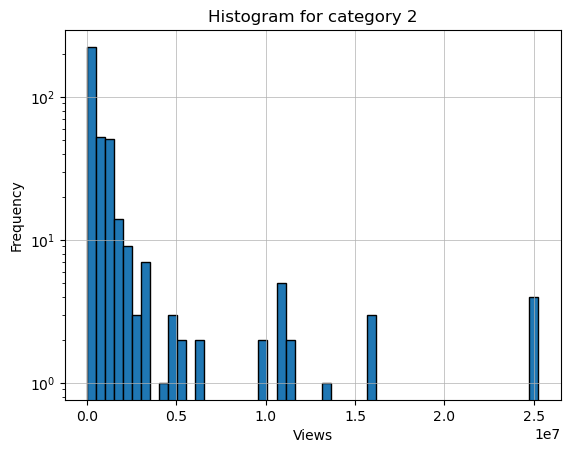

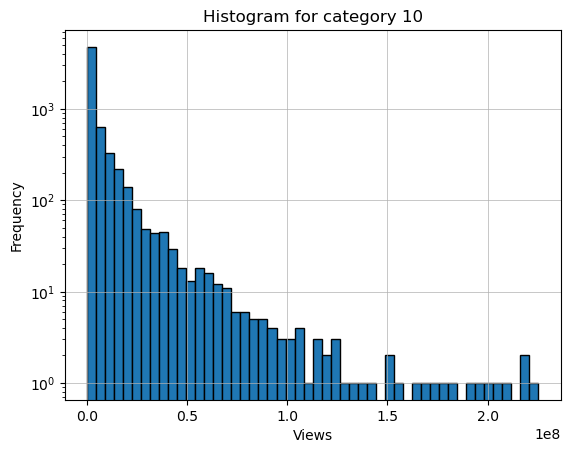

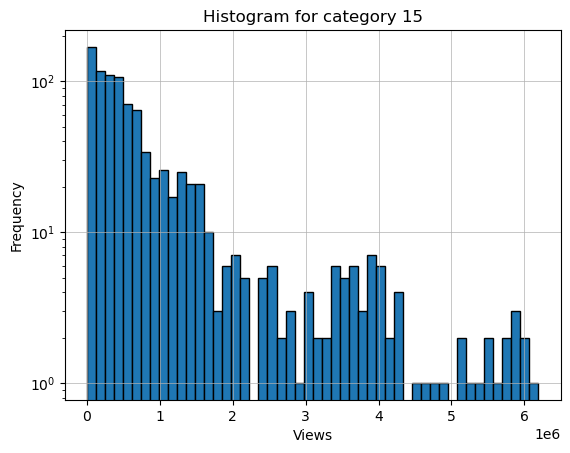

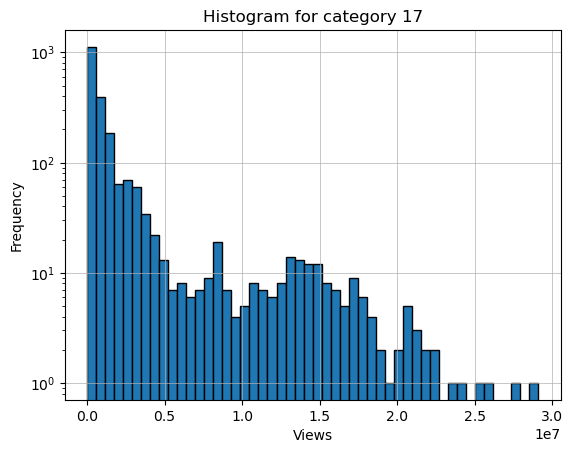

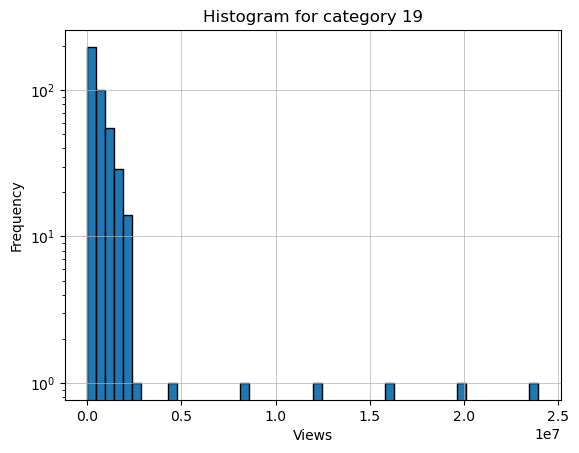

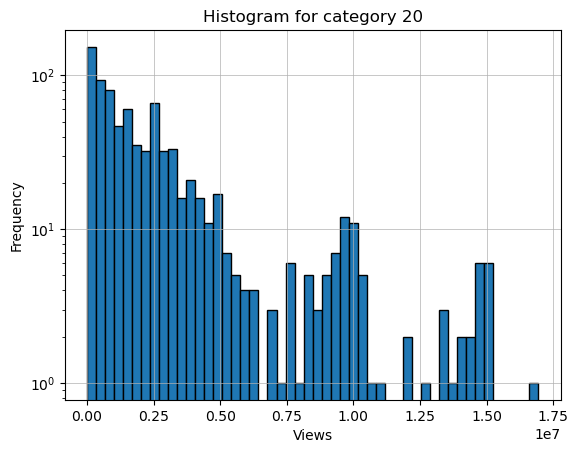

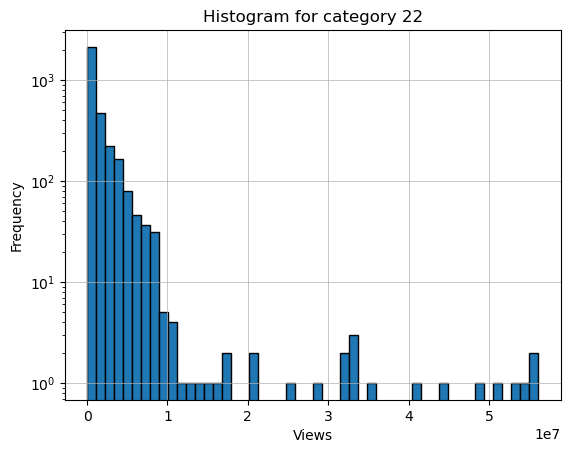

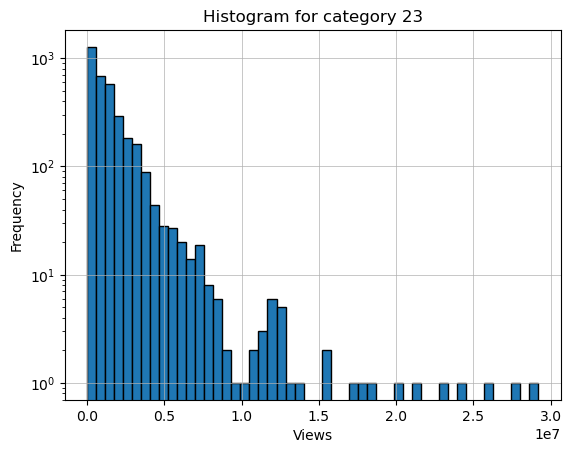

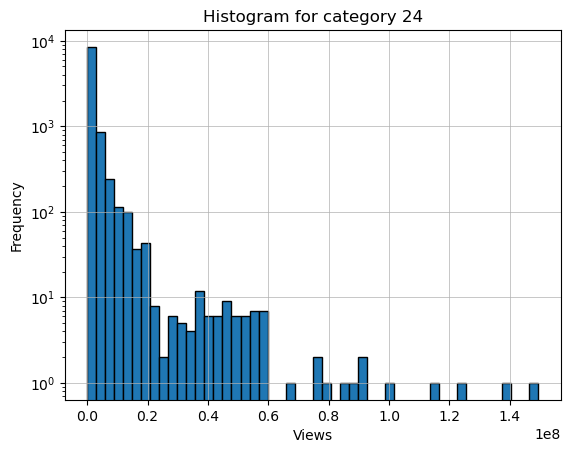

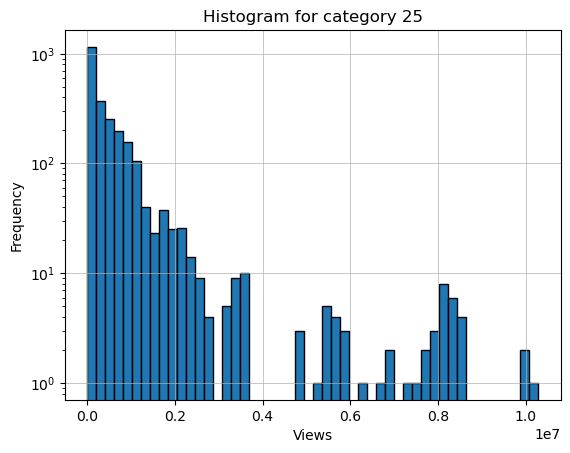

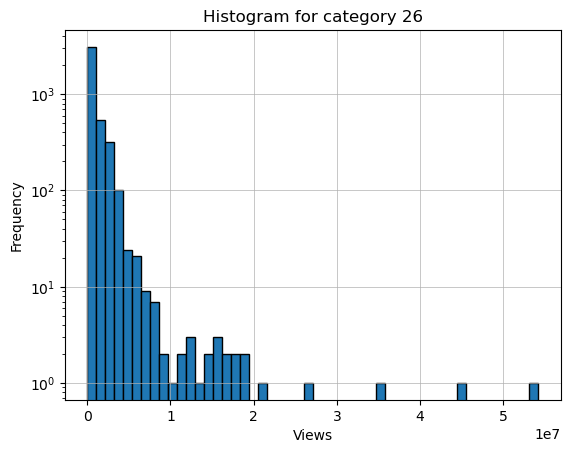

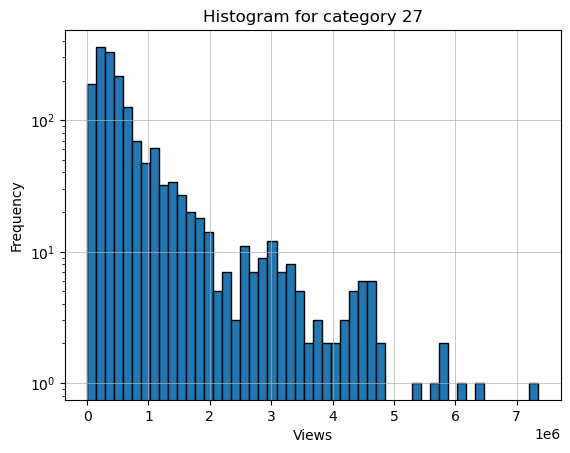

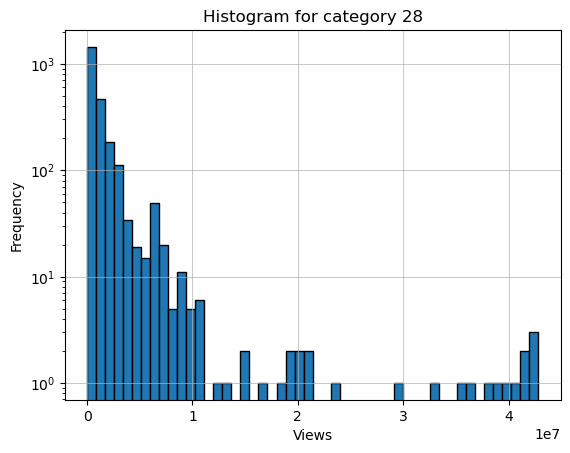

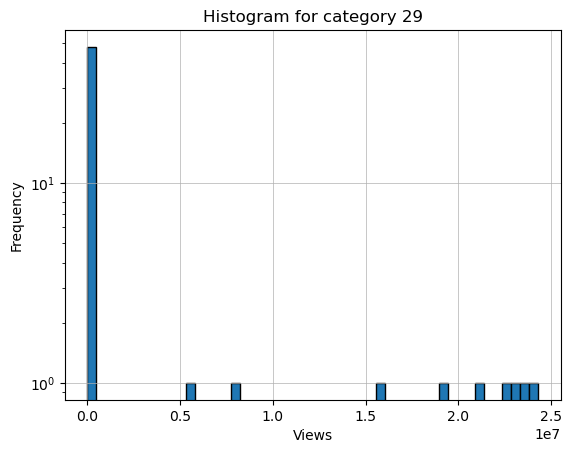

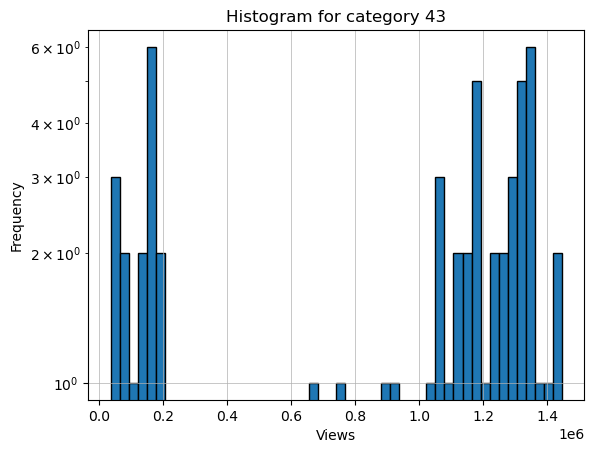

In [31]:
plt.figure(figsize=(8, 5))
for category in data_views_per_kategori.index:
    subset_df = main_df[main_df['category_id'] == category]
    plt.hist(subset_df['views'], bins=50, edgecolor='black')
    plt.xlabel('Views')
    plt.ylabel('Frequency') 
    plt.title(f"Histogram for category {category}")
    plt.yscale("log")
    plt.grid("-", linewidth=0.5)
    plt.show()


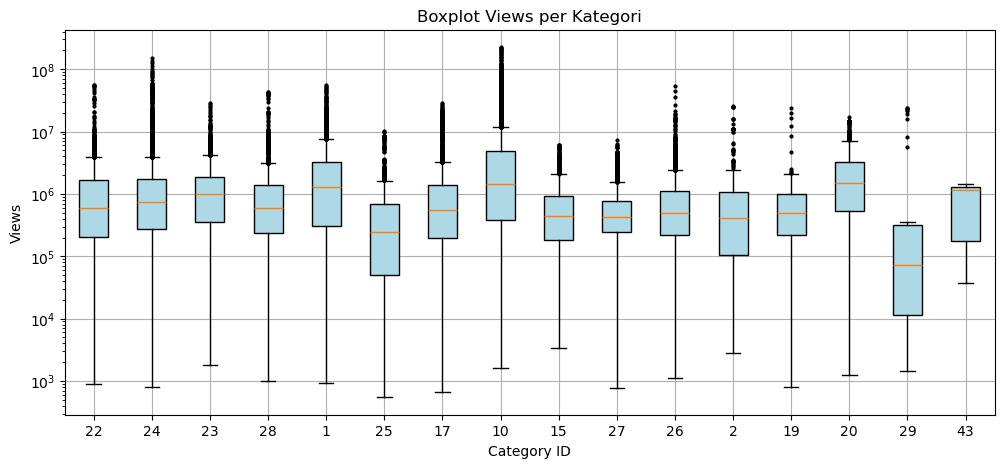

In [32]:
plt.figure(figsize=(12, 5))
plt.boxplot([main_df[main_df['category_id'] == cat]['views'] for cat in main_df['category_id'].unique()],
            patch_artist=True, 
            boxprops=dict(facecolor='lightblue'), 
            flierprops=dict(marker='o', markerfacecolor='black', markersize=2))

plt.xticks(range(1, len(main_df['category_id'].unique()) + 1), main_df['category_id'].unique())
plt.title('Boxplot Views per Kategori')
plt.xlabel('Category ID')
plt.ylabel('Views')
plt.yscale('log')
plt.grid("-")
plt.show()

In [33]:
Q1, Q3 = main_df['views'].quantile([0.25, 0.75])
IQR = Q3 - Q1
dist = 100000000 - min(Q3 + 1.5 * IQR, max(main_df[['views']].values))
print(f"The distance with the video between the upper boundary boxplot to the video with views above 100,000,000 is {int(dist):,} views")

outliers_views = len(main_df['views'][main_df['views'] > 100000000].to_list())
print(f"The total population in which the video has more than 100,000,000 is {outliers_views / len(main_df['views'].to_list()) * 100}%")

The distance with the video between the upper boundary boxplot to the video with views above 100,000,000 is 95,805,601 views
The total population in which the video has more than 100,000,000 is 0.09768248308872012%


In [34]:
condition = main_df['likes'].quantile(0.999)
population_arr_likes = main_df['likes'][main_df['likes'] >= condition].to_list()
print(f'The minimum number of likes needed to achieve the 0.1% population is {min(population_arr_likes)}')

The minimum number of likes needed to achieve the 0.1% population is 2875001
